In [89]:
import torch
import joblib
import numpy as np
import matplotlib as mpl
import matplotlib.colors as mpc
import matplotlib.pyplot as plt
import seaborn as sns
from toolz import nth
from aging.organization.paths import TrainingPaths
from kornia.geometry.transform import resize
from aging.plotting import figure, format_plots, PlotConfig, save_factory

In [87]:
format_plots()
c = PlotConfig()
saver = save_factory(c.save_path / "elastic-transforms", tight_layout=False)

In [46]:
def vector_to_rgb(angle):
    '''angle should be in degrees'''
    angle = angle % 360
    if angle < 0:
        angle += 360

    return mpc.hsv_to_rgb((angle / 360, 0.8, 0.9))

In [4]:
training_paths = TrainingPaths()

In [5]:
elastic_fits = joblib.load(training_paths.tps_fits)

In [66]:
np.array(list(elastic_fits))

array([ 24,   5,   8,   3,   9,  80,  64,  52,   7,  90,  44,  16,  48,
        78,  28,  40,  72,  32,  20,  56,  60,   4,  36,  84,  68, 103])

In [58]:
def get_quiver_parameters(age_sample):
    avg_mvmt_v = []
    poses = []
    for sample in age_sample.values():
        avg_mvmt_v.append(sample["params"]["movement_vector"])
        poses.append(sample["target"])
    avg_mvmt_v = np.median(avg_mvmt_v, axis=0)
    avg_mvmt_v = resize(torch.tensor(avg_mvmt_v), (80, 80)).numpy()
    poses = np.quantile(poses, 0.9, axis=0)

    stride = 4
    idx = np.where(poses[::stride, ::stride] > 0)
    idx = tuple(map(lambda x: x * stride, idx))
    subset = avg_mvmt_v[:, ::stride, ::stride]
    g1, g2 = np.meshgrid(
        np.linspace(0, 80, subset.shape[1]), np.linspace(0, 80, subset.shape[2])
    )

    angles = np.arctan2(subset[1], subset[0])

    mask1 = ((idx[1].min() - (2 * stride)) < g1) & (g1 < (idx[1].max() + (2 * stride)))
    mask2 = ((idx[0].min() - (2 * stride)) < g2) & (g2 < (idx[0].max() + (2 * stride)))
    mask = mask1 & mask2

    angles = angles[mask]
    colors = list(map(vector_to_rgb, np.rad2deg(angles).flatten()))
    return g1[mask], g2[mask], subset[0][mask], subset[1][mask], colors

In [60]:
x, y, u, v, c = get_quiver_parameters(elastic_fits[5])

(0.0, 80.0)

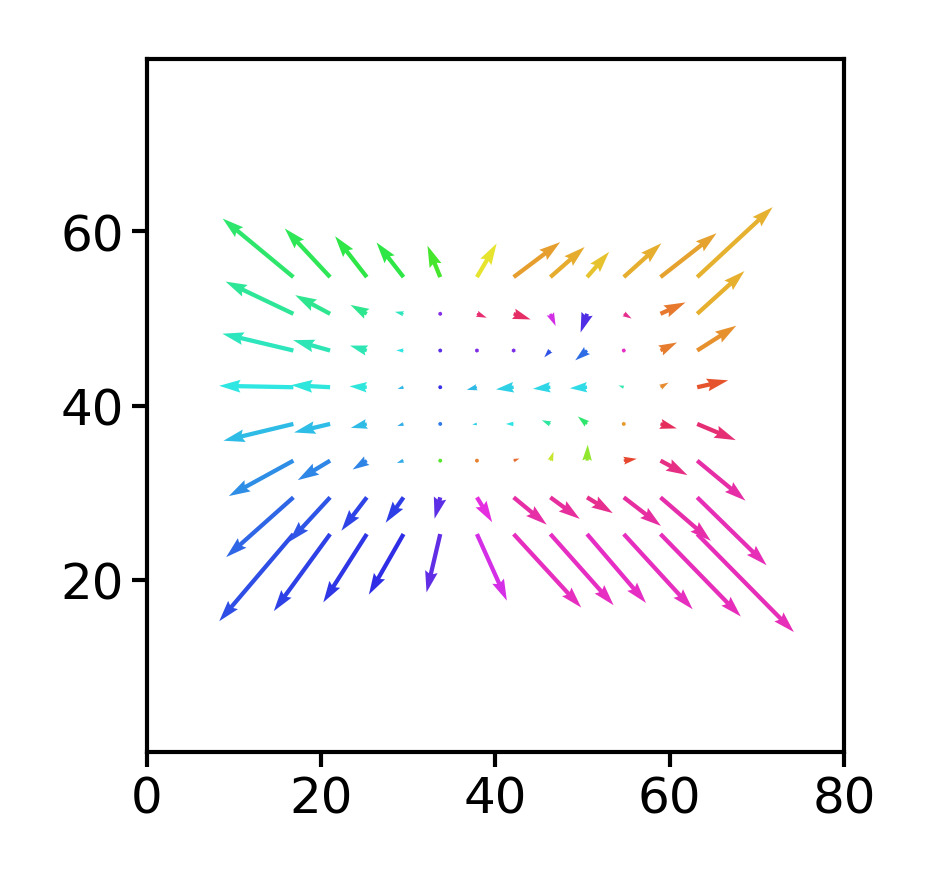

In [61]:
fig = figure(1.5, 1.5)
plt.quiver(x, y, u, v, color=c)
plt.axis('equal')
plt.xlim(0, 80)
plt.ylim(0, 80)

In [62]:
x, y, u, v, c = get_quiver_parameters(elastic_fits[103])

(0.0, 80.0)

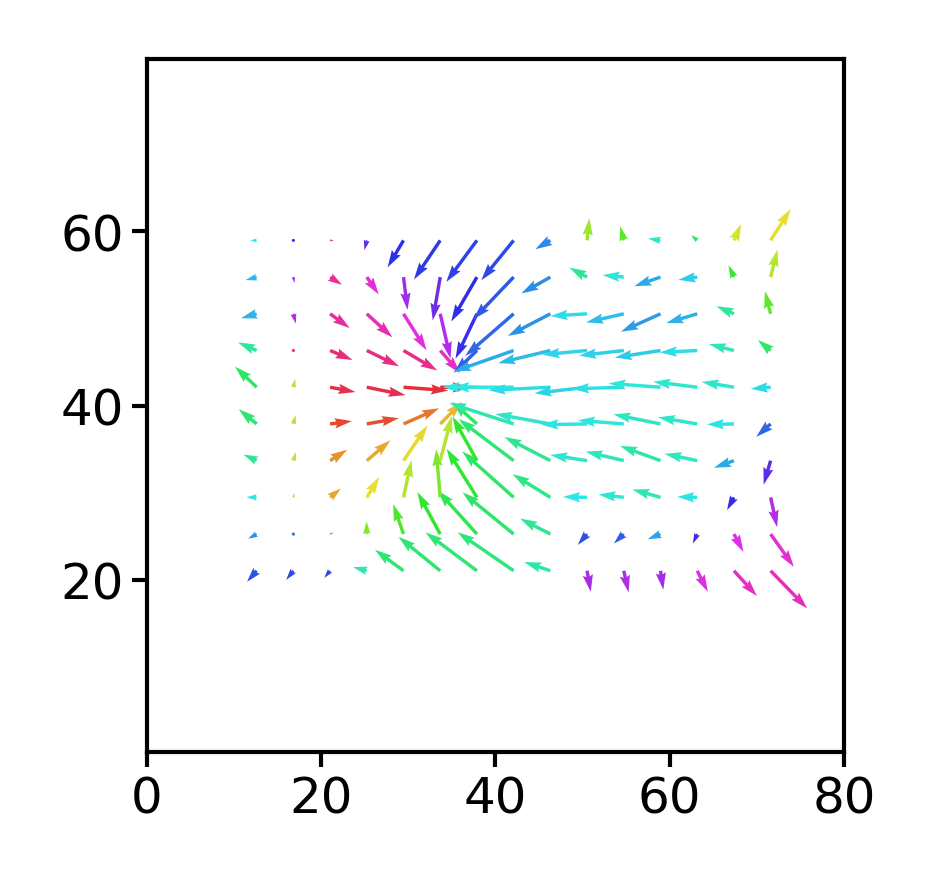

In [63]:
fig = figure(1.5, 1.5)
plt.quiver(x, y, u, v, color=c)
plt.axis('equal')
plt.xlim(0, 80)
plt.ylim(0, 80)

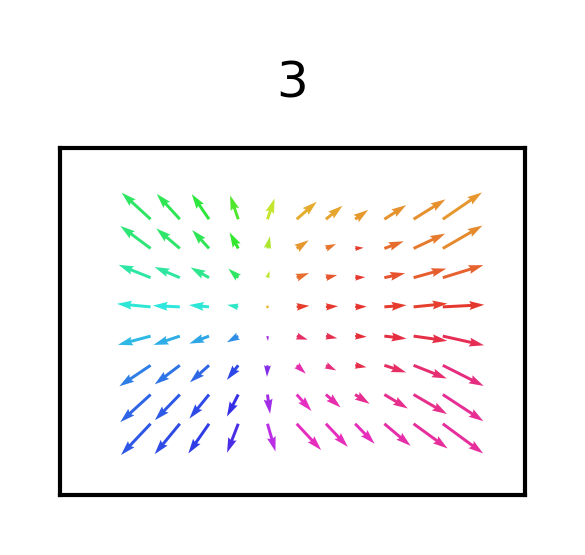

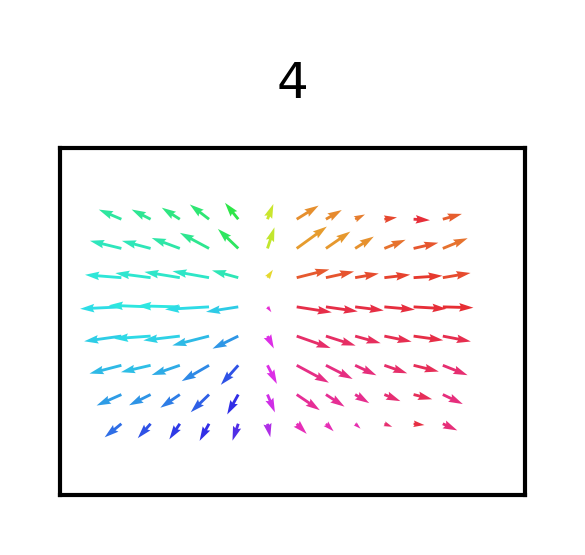

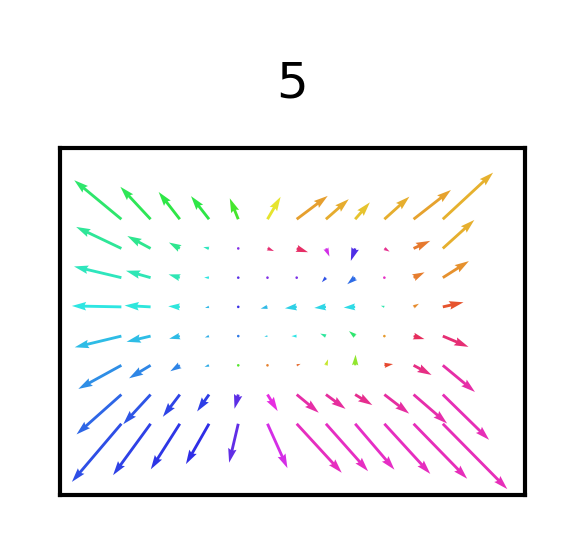

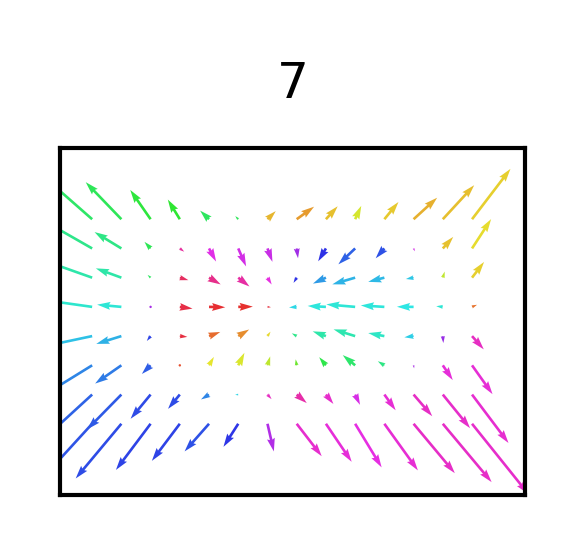

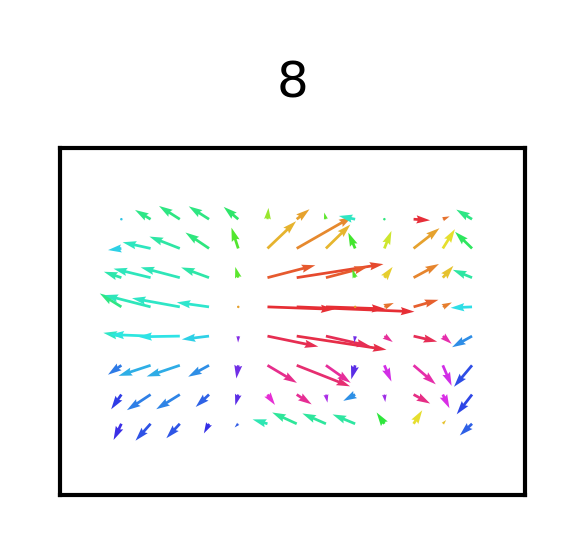

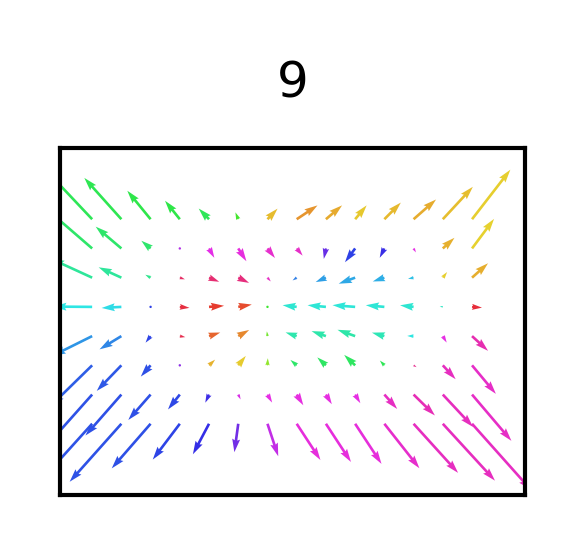

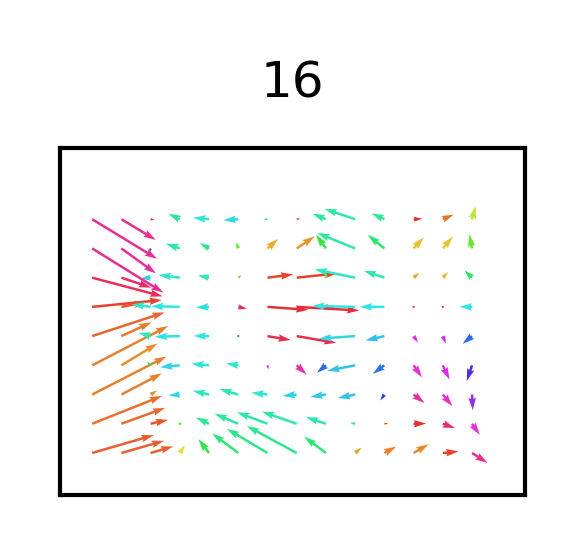

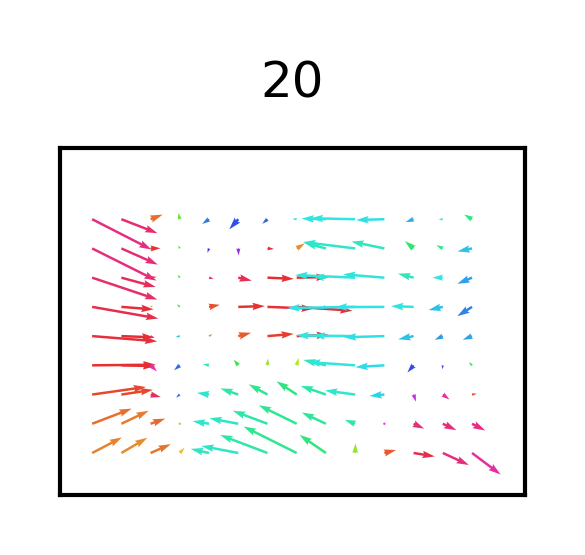

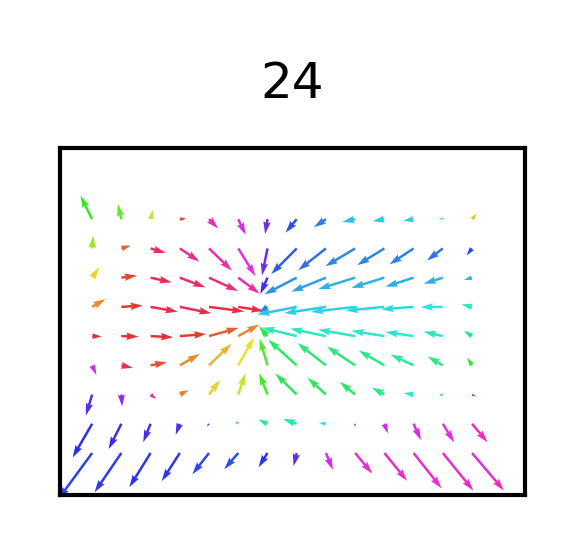

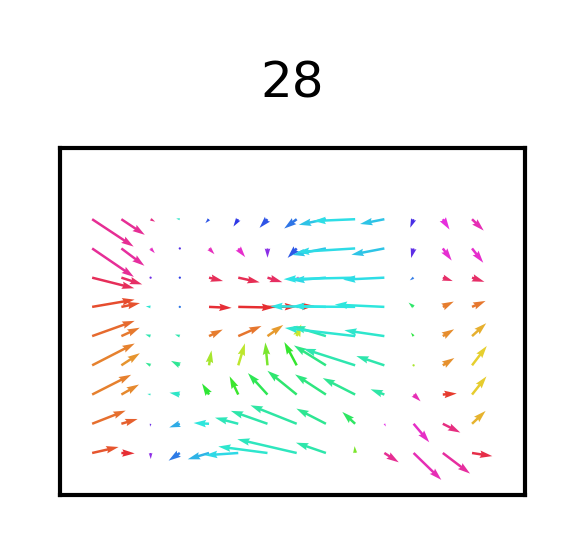

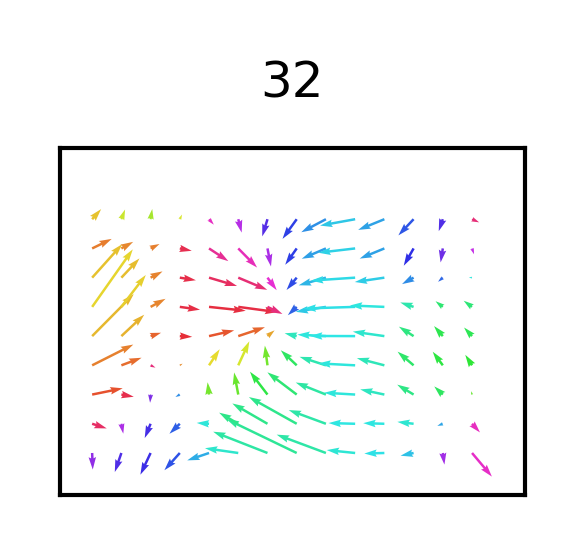

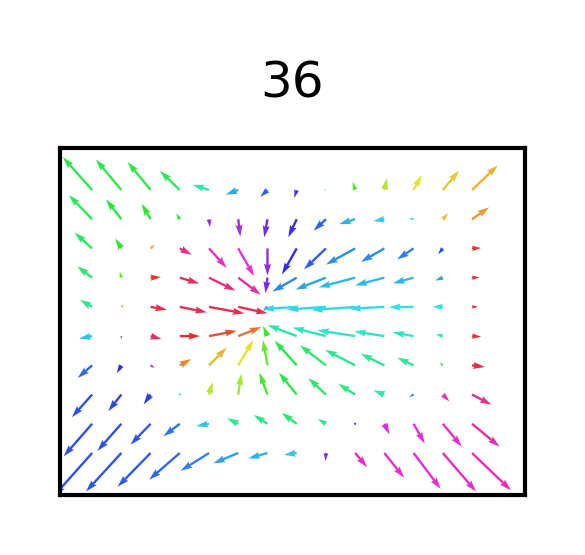

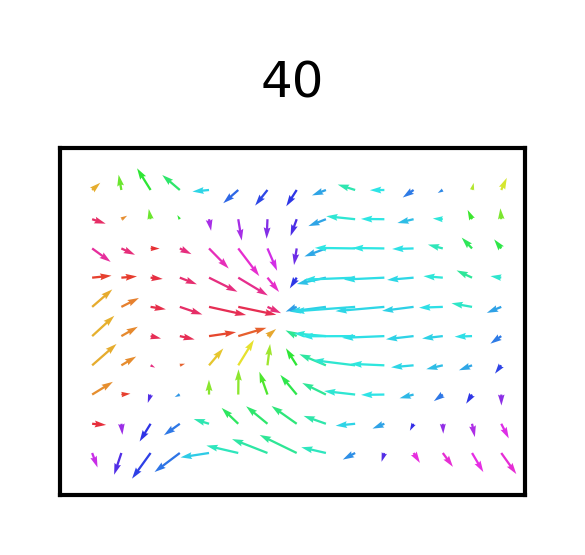

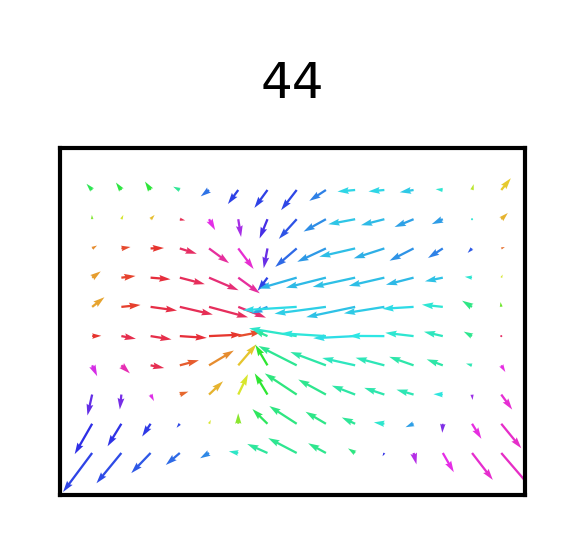

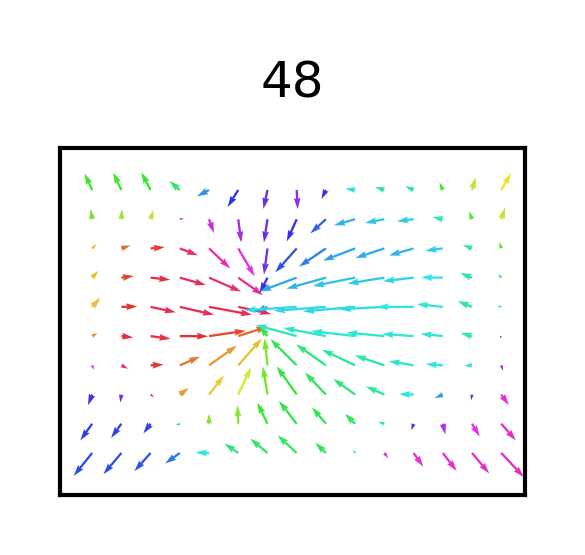

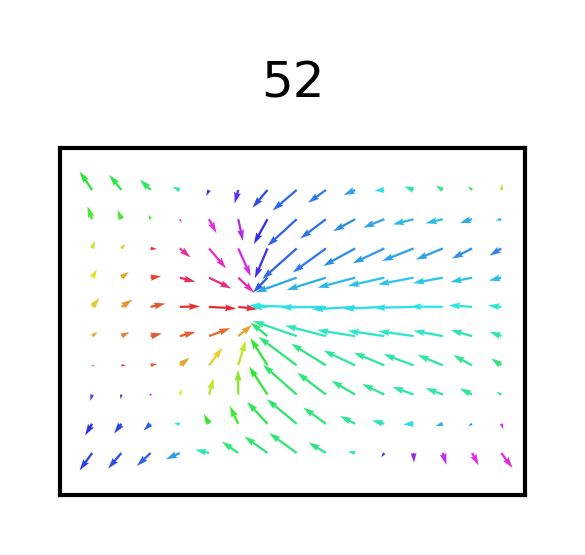

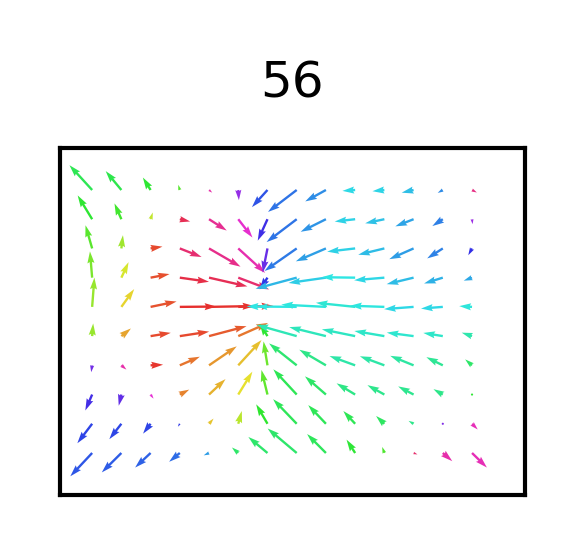

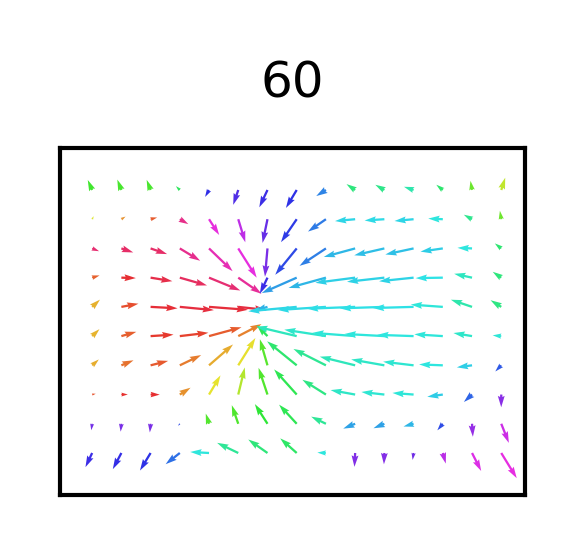

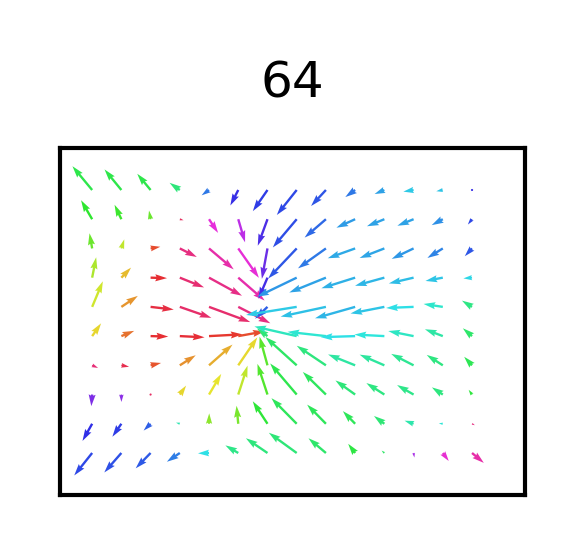

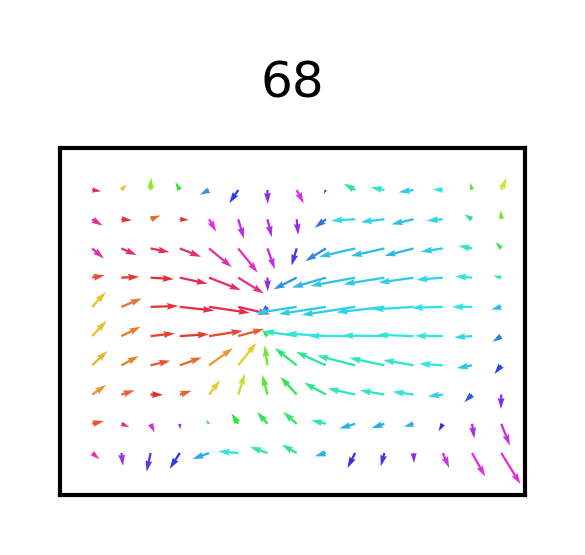

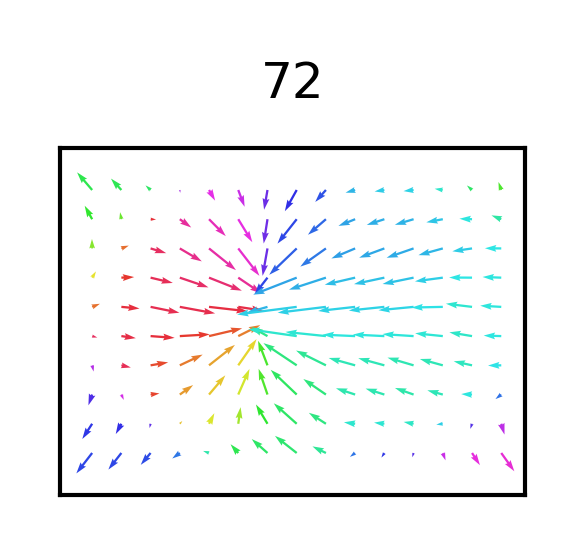

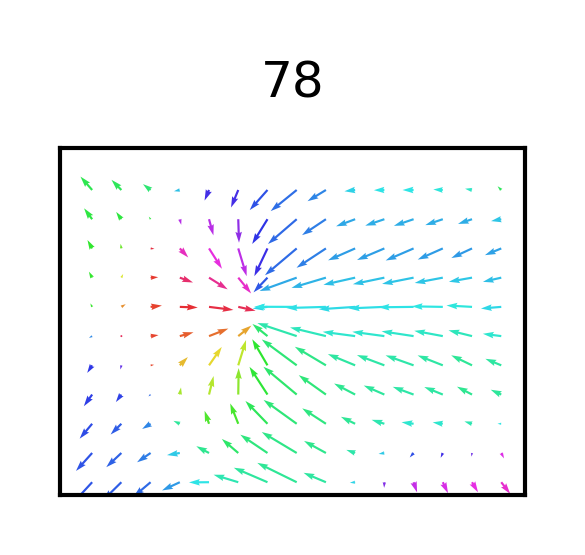

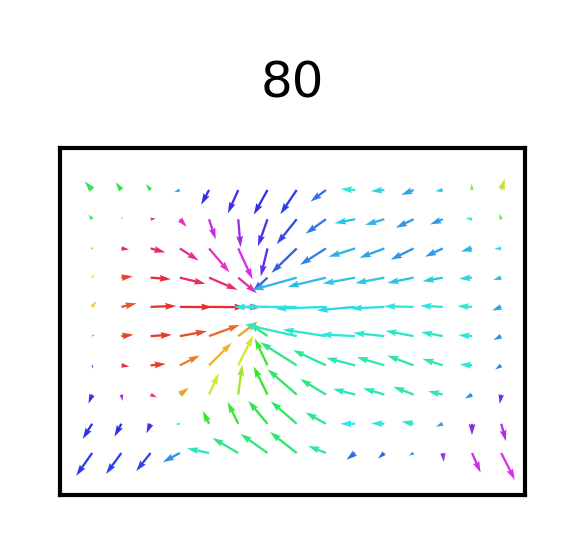

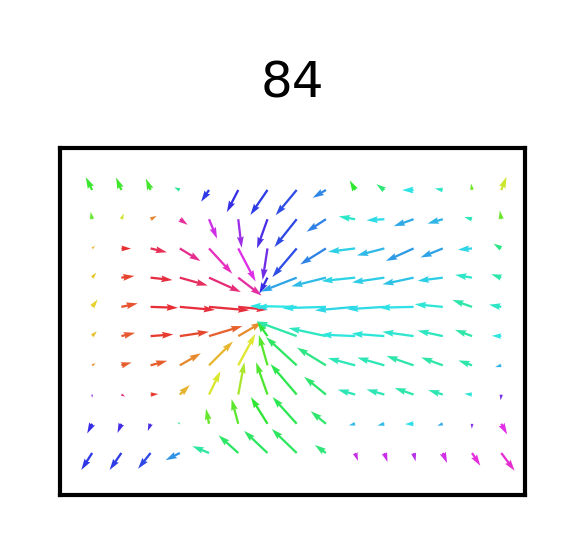

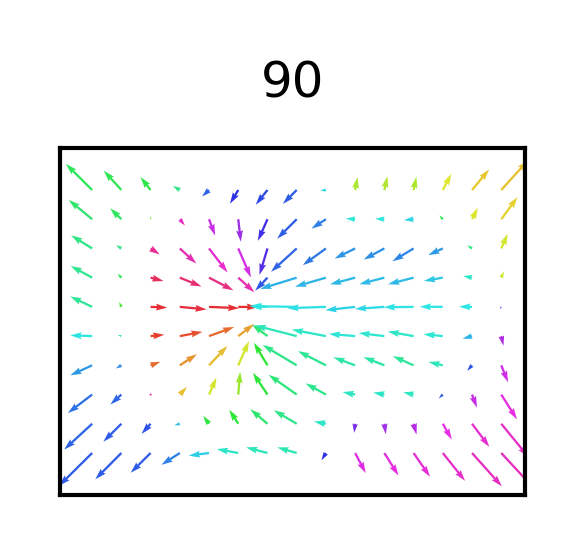

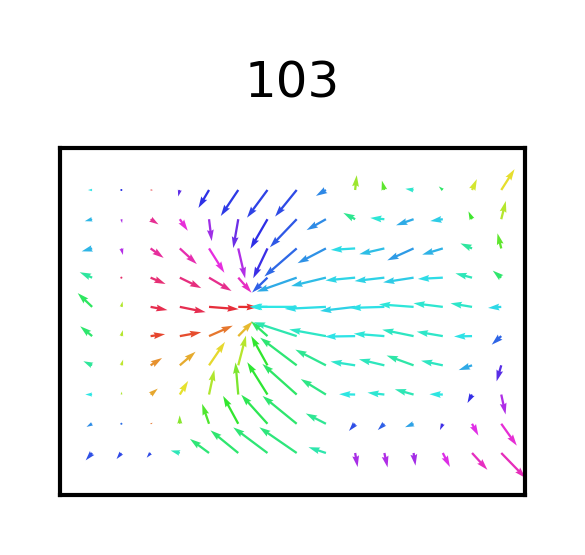

In [88]:
for age in sorted(elastic_fits):
    fig = figure(1, 1)
    x, y, u, v, c = get_quiver_parameters(elastic_fits[age])
    plt.quiver(x, y, u, v, color=c)
    ax = fig.gca()
    ax.set(aspect='equal')
    plt.xlim(8, 75)
    plt.ylim(15, 65)
    plt.xticks([])
    plt.yticks([])
    plt.title(age)
    plt.show()
    saver(fig, f"quiver-transform-{age}-weeks");

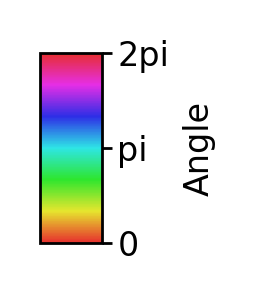

In [101]:
fig, ax = plt.subplots(figsize=(0.2, 1.25))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.colors.ListedColormap(list(map(vector_to_rgb, np.linspace(0, 360, 256))))
norm = mpl.colors.Normalize(vmin=0, vmax=np.pi * 2)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
cb1.set_label('Angle')
cb1.set_ticks([0, np.pi, np.pi * 2])
cb1.set_ticklabels([0, 'pi', '2pi'])
saver(fig, 'angle-colorbar');


In [152]:
vmax = 40

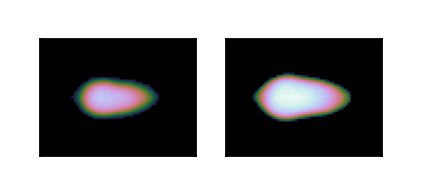

In [159]:
age_sample = elastic_fits[4]
sample = nth(3, age_sample.values())

with plt.rc_context({'image.cmap': 'cubehelix'}):
    fig, ax = plt.subplots(1, 2, figsize=(1.1, 0.5))
    ax[0].imshow(sample['target'], vmax=vmax)
    ax[1].imshow(sample['template'], vmax=vmax)
    for a in ax.flat:
        a.set(xticks=[], yticks=[], xlim=(8, 75), ylim=(15, 65), aspect='equal')
    saver(fig, '4-week-to-12-week');

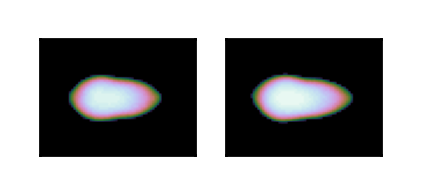

In [160]:
age_sample = elastic_fits[9]
sample = nth(1, age_sample.values())

with plt.rc_context({'image.cmap': 'cubehelix'}):
    fig, ax = plt.subplots(1, 2, figsize=(1.1, 0.5))
    ax[0].imshow(sample['target'], vmax=vmax)
    ax[1].imshow(sample['template'], vmax=vmax)
    for a in ax.flat:
        a.set(xticks=[], yticks=[], xlim=(8, 75), ylim=(15, 65), aspect='equal')
    saver(fig, '9-week-to-12-week');

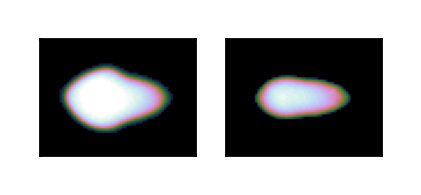

In [161]:
age_sample = elastic_fits[84]
sample = nth(1, age_sample.values())

with plt.rc_context({'image.cmap': 'cubehelix'}):
    fig, ax = plt.subplots(1, 2, figsize=(1.1, 0.5))
    ax[0].imshow(sample['target'], vmax=vmax)
    ax[1].imshow(sample['template'], vmax=vmax)
    for a in ax.flat:
        a.set(xticks=[], yticks=[], xlim=(8, 75), ylim=(15, 65), aspect='equal')
    saver(fig, '84-week-to-12-week');

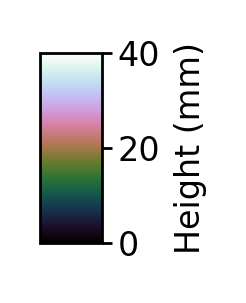

In [151]:
fig, ax = plt.subplots(figsize=(0.2, 1.25))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.cubehelix
norm = mpl.colors.Normalize(vmin=0, vmax=vmax)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
cb1.set_label('Height (mm)')
# cb1.set_ticks([0, np.pi, np.pi * 2])
# cb1.set_ticklabels()
saver(fig, 'height-colorbar');
